## Problem Statement
Rainfall is one of the most significant meteorological factors that affect many aspects of our everyday lives. The socio-economic repercussions of rainfall are remarkable, with consequences ranging from disruptions in the transportation network to damage to infrastructure, especially in the event of flood. Flood and other extreme occurrences resulting from climate change are anticipated to happen more frequently and will have disastrous repercussions in the years to come. Rainfall is, without a doubt, a crucial climatic component in agricultural productivity, as it has a considerable economic impact on any country. It is well known that a negligible water supply is one of the two main factors that limit agricultural productivity. As the world continues to experience constantly changing climatic circumstances, rainfall forecasting has become a difficult and demanding task. The country’s sustainable agriculture and resource management will greatly benefit from the forecasting of seasonal rainfall systems. In addition to the farmers who will receive enormous help from it, flood warning systems can also be implemented using rainfall predictions to create warnings so that corrective or preventive measures can be applied.  
Therefore, this project attempts to forecast the potential rainfall by forecasting the amount of precitable water available for precipitation throughout a given duration into the future (say 1 or 2 years).

### About the Dataset
#### Data Source: https://www.kaggle.com/datasets/shiratorizawa/ncarcsv2

The datset contains atmospheric variables over different latitude and longitude starting from year 1948 to 2018. There are 21 features.  
- lat : Latitude
- lon : Longitude
- time : Dates
- slp : Mean sea level pressure
- uwnd-x, uwnd-y and uwnd : U-wind
- vwnd-x, vwnd-y and vwnd : V-wind
- tmp-x, tmp-y and tmp : Temperature
- omega-x, omega-y and omega : Vertical Wind velocity
- rhum-x, rhum-y and rhum : relative humidity
- pr-wtr : Precipitable water
- rain : Rainfall

In [ ]:
from prophet import Prophet
from neuralprophet import NeuralProphet

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = None

### Load data

In [2]:
df = pd.read_csv(r'.\data\finalDatasetWithRain.csv')

In [3]:
df.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1948-01-01,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,...,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990,-9999.0
1,30.0,70.0,1948-01-02,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,...,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995,-9999.0
2,30.0,70.0,1948-01-03,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,...,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994,-9999.0
3,30.0,70.0,1948-01-04,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,...,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995,-9999.0
4,30.0,70.0,1948-01-05,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,...,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994,-9999.0


#### Filtering the data for one location (lat: 30, lon: 70)

In [9]:
df_30_70 = df[(df.lat==30.0) & (df.lon==70.0)]

df_30_70.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1948-01-01,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,...,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990,-9999.0
1,30.0,70.0,1948-01-02,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,...,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995,-9999.0
2,30.0,70.0,1948-01-03,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,...,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994,-9999.0
3,30.0,70.0,1948-01-04,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,...,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995,-9999.0
4,30.0,70.0,1948-01-05,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,...,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994,-9999.0


In [6]:
df_30_70.dtypes

lat        float64
lon        float64
time        object
omega_x    float64
omega_y    float64
omega      float64
pr_wtr     float64
rhum_x     float64
rhum_y     float64
rhum       float64
slp        float64
tmp_x      float64
tmp_y      float64
tmp        float64
uwnd_x     float64
uwnd_y     float64
uwnd       float64
vwnd_x     float64
vwnd_y     float64
vwnd       float64
rain       float64
dtype: object

In [10]:
# Making the time colume to datetime and setting it to index
df_30_70['time'] = pd.to_datetime(df_30_70['time'])
df_30_70.set_index('time', inplace=True)

<AxesSubplot:xlabel='time'>

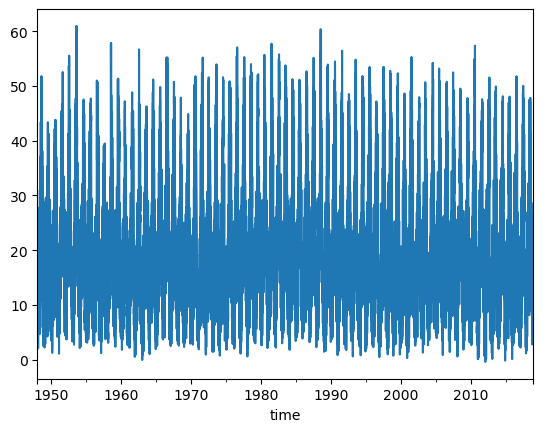

In [11]:
df_30_70['pr_wtr'].plot()

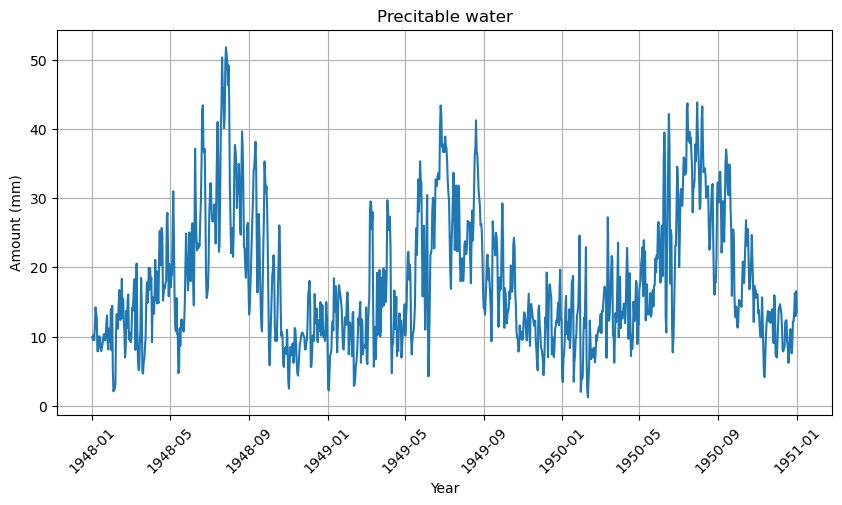

In [12]:
first_year = df_30_70.pr_wtr.loc[df_30_70.pr_wtr.index<='1951-01-01']
plt.figure(figsize=(10,5))
plt.plot(first_year)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Amount (mm)')
plt.title('Precitable water')
plt.grid()
plt.show()